In [1]:
# Import all required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
# Load Dataset 
df = pd.read_csv("case5_image_features_kmeans_1000.csv")
df.head()

,ColorIntensity,TextureScore,ShapeComplexity,EdgeDensity
0,0.680929,0.038433,0.621340,0.844423
1,0.897243,0.275054,0.521489,0.631553
2,0.890827,0.834862,0.861944,0.078709
3,0.976490,0.293890,0.491713,0.486350
4,0.700215,0.056901,0.127743,0.209759


In [3]:
# Feature
X = df[["ColorIntensity","TextureScore","ShapeComplexity","EdgeDensity"]]

In [4]:
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

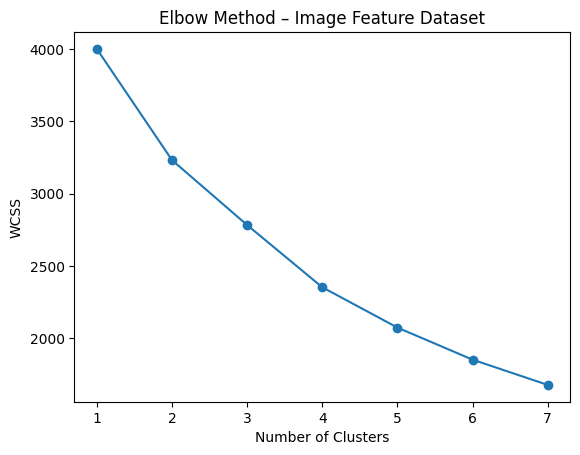

In [5]:
# Elbow Method
wcss = []

for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 8), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method – Image Feature Dataset")
plt.show()


In [6]:
# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

df.head()

,ColorIntensity,TextureScore,ShapeComplexity,EdgeDensity,Cluster
0,0.680929,0.038433,0.621340,0.844423,2
1,0.897243,0.275054,0.521489,0.631553,2
2,0.890827,0.834862,0.861944,0.078709,2
3,0.976490,0.293890,0.491713,0.486350,2
4,0.700215,0.056901,0.127743,0.209759,2


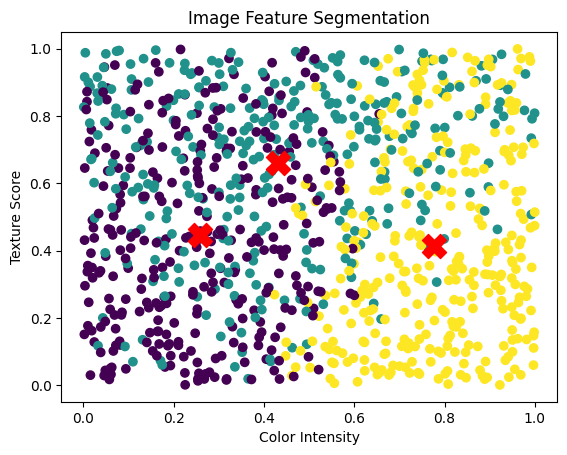

In [7]:
# Visualization
plt.scatter(
    df["ColorIntensity"],
    df["TextureScore"],
    c=df["Cluster"]
)
# Inverse transform centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
# Plot centroids
plt.scatter(
    centroids[:, 0],   # ColorIntensity
    centroids[:, 1],   # TextureScore
    s=300,
    c='red',
    marker='X',
    label='Centroids'
)

plt.xlabel("Color Intensity")
plt.ylabel("Texture Score")
plt.title("Image Feature Segmentation")
plt.show()
